<a href="https://colab.research.google.com/github/staller84/minhee/blob/master/hw4_pmh_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape:  (60000, 1, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 1, 28, 28)
Test labels shape:  (10000,)


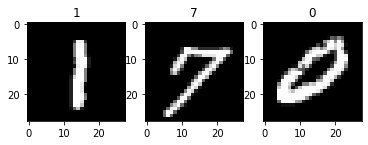

In [2]:
import numpy as np
import os
import urllib
import gzip
import matplotlib.pyplot as plt

def load_mnist():
    url_tr_dat = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
    url_tr_lab = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
    url_ts_dat = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
    url_ts_lab = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'

    if not os.path.exists('./mnist-batches-py'):
        os.mkdir('mnist-batches-py')

        urllib.request.urlretrieve(url_tr_dat, './mnist-batches-py/train-images-idx3-ubyte.gz')
        urllib.request.urlretrieve(url_tr_lab, './mnist-batches-py/train-labels-idx1-ubyte.gz')
        urllib.request.urlretrieve(url_ts_dat, './mnist-batches-py/t10k-images-idx3-ubyte.gz')
        urllib.request.urlretrieve(url_ts_lab, './mnist-batches-py/t10k-labels-idx1-ubyte.gz')

    X_train_f = gzip.open('./mnist-batches-py/train-images-idx3-ubyte.gz', 'rb')
    y_train_f = gzip.open('./mnist-batches-py/train-labels-idx1-ubyte.gz', 'rb')
    X_test_f = gzip.open('./mnist-batches-py/t10k-images-idx3-ubyte.gz', 'rb')
    y_test_f = gzip.open('./mnist-batches-py/t10k-labels-idx1-ubyte.gz', 'rb')

    s = X_train_f.read()
    loaded = np.frombuffer(s, dtype=np.uint8)
    X_train = loaded[16:].reshape((60000, 1, 28, 28)).astype(float)

    s = y_train_f.read()
    loaded = np.frombuffer(s, dtype=np.uint8)
    y_train = loaded[8:].reshape((60000,)).astype('uint8')

    s = X_test_f.read()
    loaded = np.frombuffer(s, dtype=np.uint8)
    X_test = loaded[16:].reshape((10000, 1, 28, 28)).astype('uint8')

    s = y_test_f.read()
    loaded = np.frombuffer(s, dtype=np.uint8)
    y_test = loaded[8:].reshape((10000,)).astype('uint8')

    X_train_f.close()
    y_train_f.close()
    X_test_f.close()
    y_test_f.close()

    return X_train, y_train, X_test, y_test

mnist_data = load_mnist()

X_train = mnist_data[0]
y_train = mnist_data[1]

X_test = mnist_data[2]
y_test = mnist_data[3]

# Check the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

# select three random number images
num_plot=3
sample_index = np.random.randint(0,X_train.shape[0],(num_plot,))

# plot the selected images
for i in range(num_plot):
  img=np.squeeze(X_train[sample_index[i]])
  ax=plt.subplot('1'+str(num_plot)+str(i))
  plt.imshow(img,cmap=plt.get_cmap('gray'))
  ######
  ## Q5. Complete the below function ax.set_title
  #####
  ax.set_title(y_train[sample_index[i]])

plt.show()